## 변수 중요도(Feature importancce)
 - 변수 중요도를 확인할 수 있는 대표적인 방법 중 하나인 Permutation Feature Importance에 대해 설명하고자 합니다.
    - Permutation Feature Importance는 Black-box 모델에 대하여, 특정 feature를 안 썼을 때, 이것이 성능 손실에 얼마만큼의 영향을 주는지를 통해 그 feature의 중요도를 파악하는 방법입니다.

## Permutatuion Feature importance
- Permutation Feature Importance의 중요한 특징이자 장점으로는 재학습시킬 필요가 없다는 것입니다
- 특정 Feature를 제거하고 모델을 재학습해서 중요도를 파악하는 방법도 있지만, 그렇게 하면 당연히 시간적, 자원적 소모가 매우 클 것입니다. 그 feature를 제거하고 예측하기 위해서는, X의 차원이 변경되어 새로 학습시켜야 하기 때문입니다

- 섞었을 때 예측값이 실제 값보다 얼마나 차이가 더 생겼는지를 통해 해당 feature의 영향력을 파악

- 각 feature의 중요도 안에는 다른 feature들과의 교호작용(한 요인의 효과가 다른 요인의 수준에 의존하는 경우)도 포함됩니다.

-  Permutation Feature Importance를 적용하기 앞서 주의해야 할 점이 있습니다. 이 방법은 값을 무작위로 섞는 것이 특징입니다. 그렇기 때문에, 할 때마다 결과가 매우 달라질 수 있습니다.

- Permutation Importance는 다음과 같은 장점을 가지고 있다.
    - 계산이 빠르다
    - 사용범위가 넓고 이해하기 쉽다
    - 일관된 feature의 중요도를 측정할 수 있다.

### 1. Permutation Importance using ELI5 library

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
df =pd.read_csv('/content/drive/MyDrive/Pima/diabetes.csv')

X = df.iloc[:, :-1]
y = df.iloc[:, -1]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

In [ ]:
# Training and fitting a Random Forest Model
my_model = RandomForestClassifier(n_estimators=100,random_state=0).fit(X_train, y_train)

In [ ]:
!pip install eli5

In [ ]:
# Calculating and Displaying importance using the eli5 library
import eli5
from eli5.sklearn import PermutationImportance

perm = PermutationImportance(my_model, random_state=1).fit(X_test,y_test)
eli5.show_weights(perm, feature_names = X.columns.tolist())

Weight,Feature
0.0885 ± 0.0198,Glucose
0.0229 ± 0.0425,Age
0.0188 ± 0.0106,BloodPressure
0.0031 ± 0.0193,Insulin
0.0021 ± 0.0193,BMI
-0.0021 ± 0.0352,DiabetesPedigreeFunction
-0.0031 ± 0.0193,Pregnancies
-0.0062 ± 0.0078,SkinThickness


### 2. Partial Dependence Plots

- PDP(부분의존도그래프, Partial Dependence Plot) 란 예측모델을 만들었을 때, 어떤 특성(feature)이 예측모델의 타겟변수(target variable)에 어떤 영향을 미쳤는지 알기 위한 그래프입니다. PDP는 회귀문제와 분류문제 모두에 사용할 수 있습니다.

- The partial dependence plot (short PDP or PD plot) shows the marginal effect one or two features have on the predicted outcome of a machine learning model( [J. H. Friedman 2001](https://statweb.stanford.edu/~jhf/ftp/trebst.pdf)). / (Friedman, Jerome H. “Greedy function approximation: A gradient boosting machine.” Annals of statistics (2001): 1189-1232) -> PDP의 출발! Gradient Boosting  



#### 의미 및 목적

- tree 기반의 모델은 함수식을 통해 모델의 입력과 출력의 관계를 알 수 없음. 그 이유는 tree기반의 모델은 informaton gain에 따라 sample들을 subgroup으로 나누는데 집중하기 때문이다.

- 이럴 때, 입력과 출력의 관계를 알아볼 수 있는 방법 중 하나가 Partial Dependence plot이다.

- Partial Dependence plot의 목적은 하나 혹은 두 개의 변수가 예측 결과에 미치는 주변 효과(marginal effect)를 알아보는 것이다.

- 주변 효과의 의미는 주변 분포(marginal distribution)에서 유추할 수 있다.

- 즉, 한 확률변수의 값을 고정시키고, 다른 확률변수의 값을 변화하면서 그에 따른 확률 값을 모두 더하는 것이다.

- 회귀에서는 순간적인 변화량(미분)을 이용하여 계산함.(https://www.aptech.com/blog/marginal-effects-of-linear-models-with-data-transformations/)

- Partial Dependence Plot의 가장 큰 장점은 종속 변수와 관심 있는 독립 변수의 관계가 선형인지, 단조적인지, 복잡한지(고차) 다양한 형태의 관계를 볼 수 있다는 것이다


- 참고(https://moondol-ai.tistory.com/408)

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
df = pd.read_csv('/content/drive/MyDrive/Pima/diabetes.csv')

X = df.iloc[:, :-1]
y = df.iloc[:, -1]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

In [ ]:
# training and fitting a Decision Tree
from sklearn.tree import DecisionTreeClassifier
feature_names = [i for i in df.columns]
tree_model = DecisionTreeClassifier(random_state=0).fit(X_train, y_train)

In [ ]:
feature_names = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age']

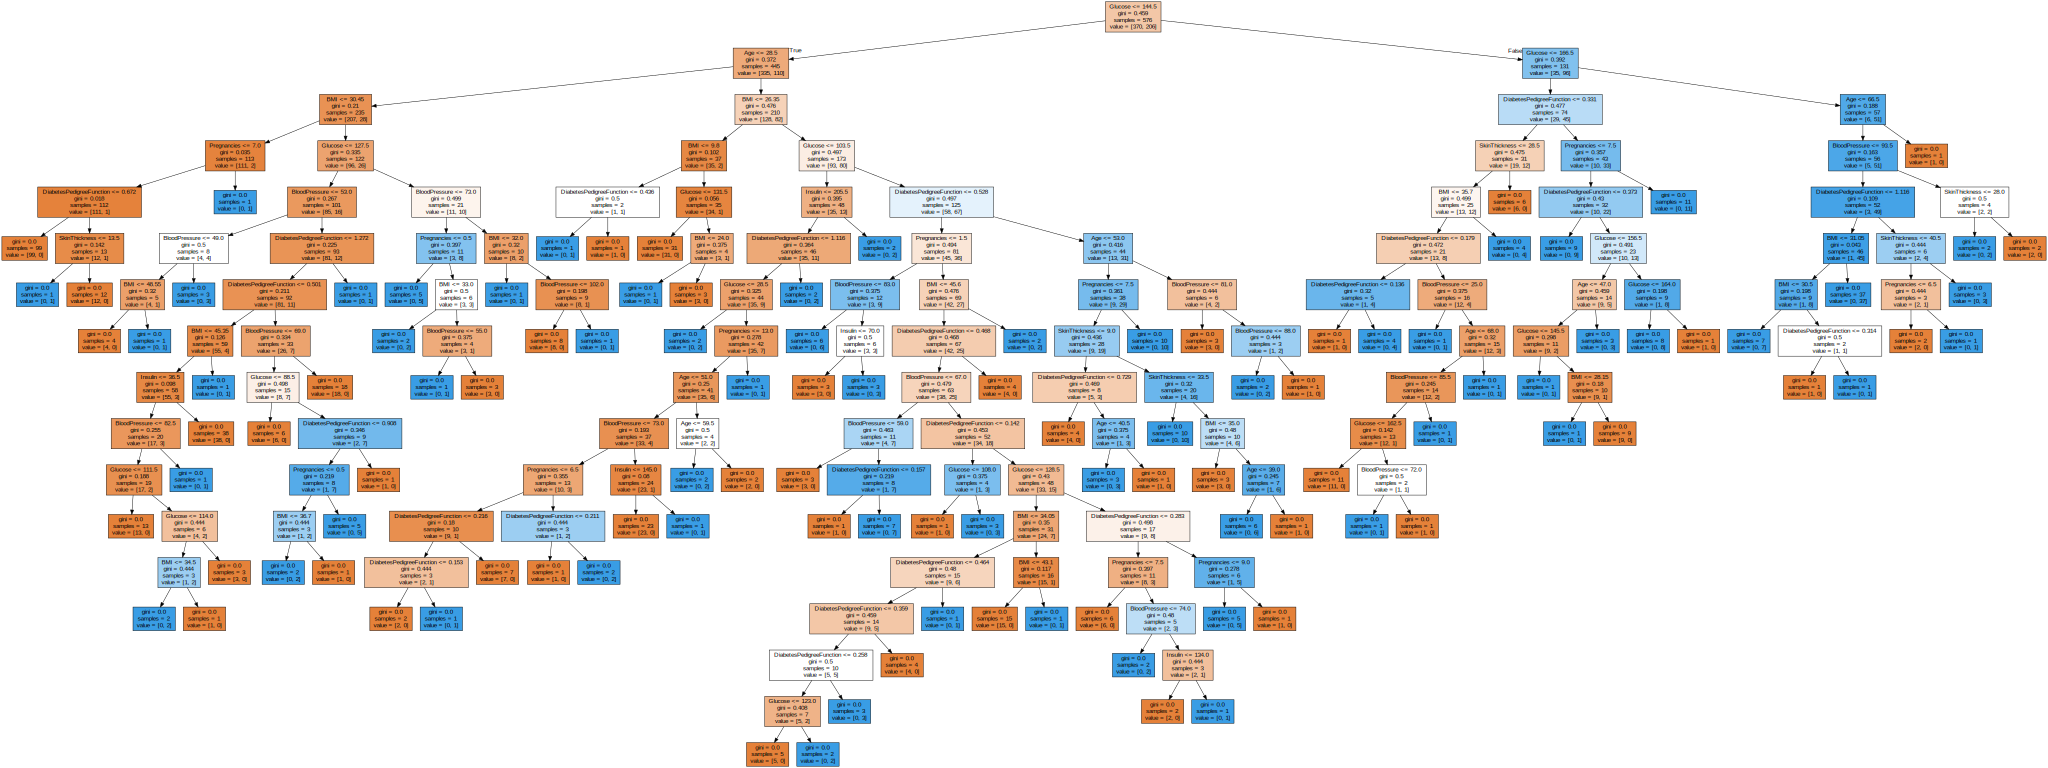

In [ ]:
# Let's plot a decision tree source : #https://www.kaggle.com/willkoehrsen/visualize-a-decision-tree-w-python-scikit-learn
# Since there are a lot of attributes, it is difficult to actually make sense of the decision tree graph in this notebook.
# It is advised to export it as png and view it.

from sklearn import tree
import graphviz

tree_graph = tree.export_graphviz(tree_model, out_file=None, feature_names=feature_names,filled = True)
graphviz.Source(tree_graph)

- The library to be used for plotting PDPs is called python partial dependence plot toolbox or simply [PDPbox]. PDPs are also calculated after a model has been fit. In our dataset there are a lot of features like Glucose, BLood Pressure, Age etc. We start by considering a single row.

- We proceed by fitting our model and calculating the probability of a person having diabetes which is our target variable. Next, we would choose a variable and continuously alter its value. For instance, we will calculate the outcome if the person's insulin level is 50,100,150 and so on. All these values are then plotted and we get a graph of predicted vs actual outcome.(https://pdpbox.readthedocs.io/en/latest/)

In [ ]:
!pip install pdpbox==0.2.0
!pip install wheel

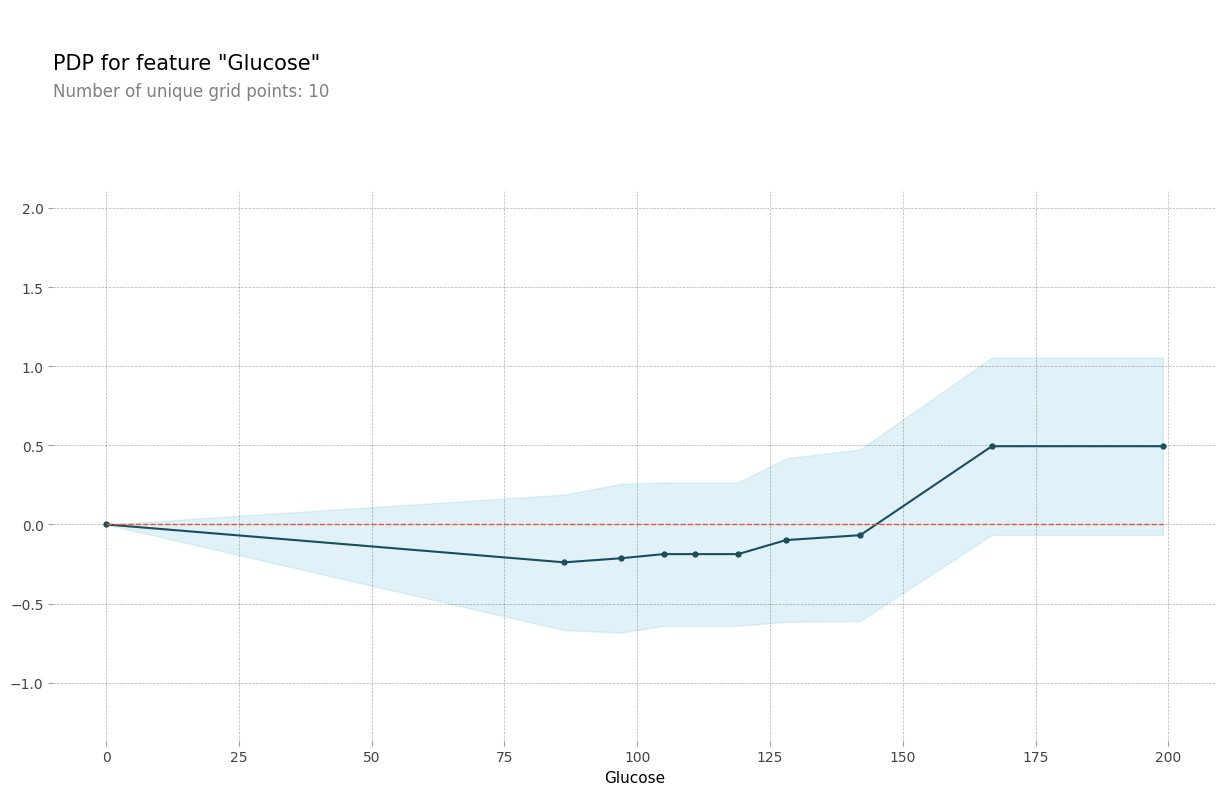

In [ ]:
import matplotlib.pyplot as plt
from pdpbox import pdp, get_dataset, info_plots

# Create the data that we will plot
pdp_goals = pdp.pdp_isolate(model=tree_model, dataset=X_test, model_features=feature_names, feature='Glucose')

# plot it
pdp.pdp_plot(pdp_goals, 'Glucose')
plt.show()

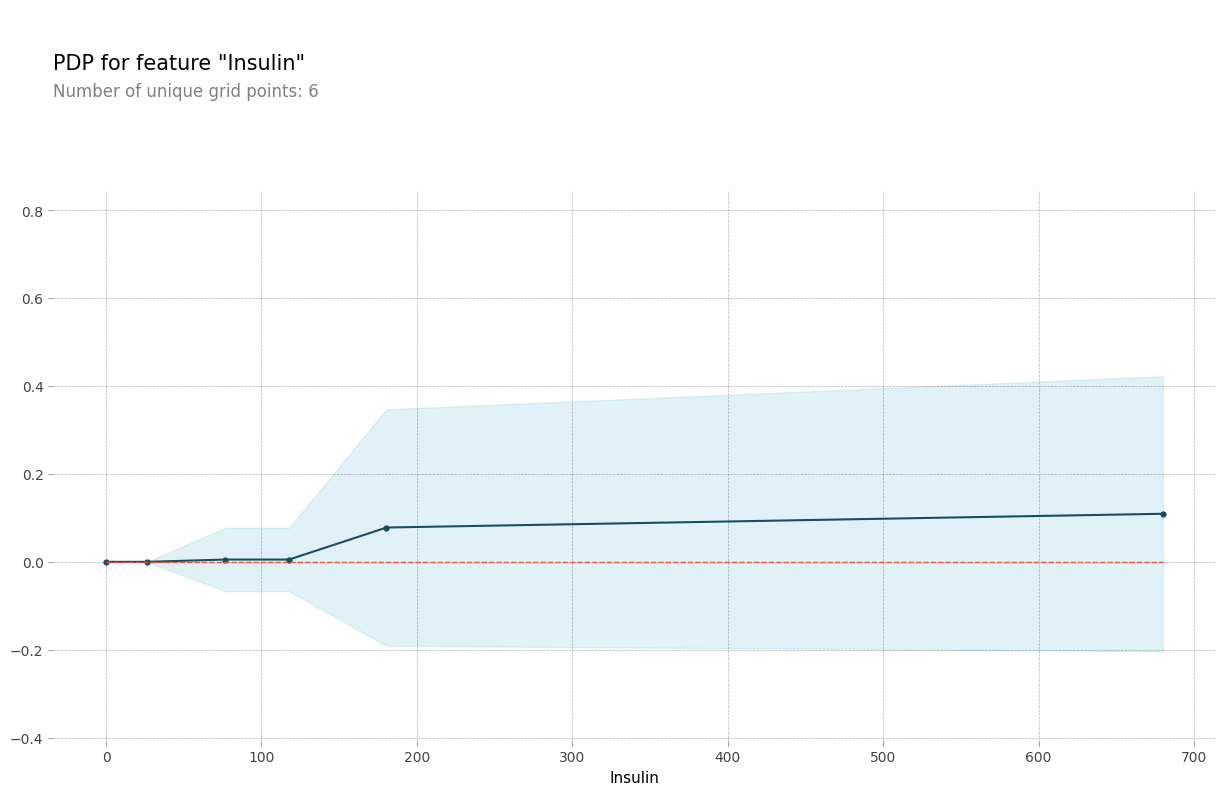

In [ ]:
# Create the data that we will plot
pdp_goals = pdp.pdp_isolate(model=tree_model, dataset=X_test, model_features=feature_names, feature='Insulin')

# plot it
pdp.pdp_plot(pdp_goals, 'Insulin')
plt.show()

- 인슐린이 있을 때, 타겟 변수의 postive value에 대한 확률이 올라간다고 해석할 수 있음.

-Interpretation

    - The Y-axis represents the change in prediction from what it would be predicted at the baseline or leftmost value.
    - Blue area denotes the confidence interval
    - For the ‘Glucose’ graph, we observe that probability of a person having diabetes steeply increases as the glucose level goes beyond 140 and then the probability remains high.

- We can also visualize the partial dependence of two features at once using 2D Partial plots.

TypeError: ContourLabeler.clabel() got an unexpected keyword argument 'contour_label_fontsize'

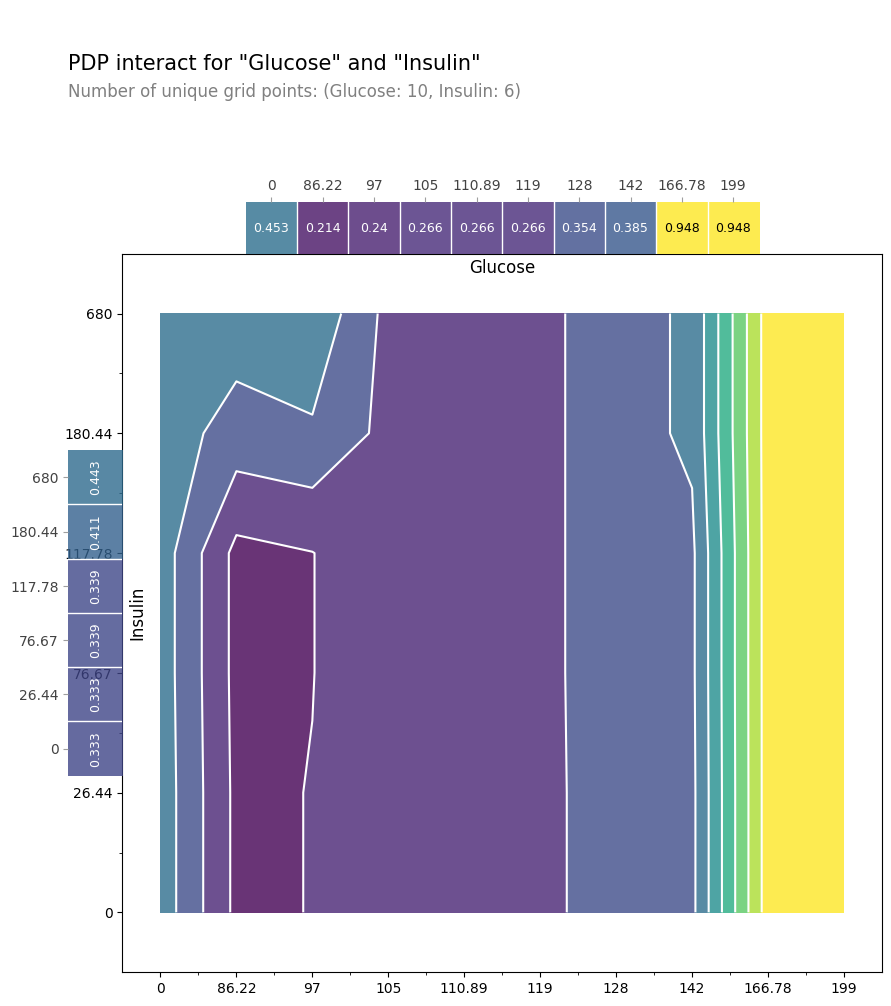

In [ ]:
features_to_plot = ['Glucose','Insulin']
inter1  =  pdp.pdp_interact(model=tree_model, dataset=X_test, model_features=feature_names, features=features_to_plot)

pdp.pdp_interact_plot(pdp_interact_out=inter1, feature_names=features_to_plot, plot_type='contour', plot_pdp=True)
plt.show()

- PDP분석은 특성과 타겟변수의 관계를 전체적으로만 파악할 수 있을뿐 개별 관측치에 대한 설명을 하기에는 부족합니다.

- 그래서 PDP는 전역적 (Global) 방법론으로 분류, 개별 관측치에 대한 방법론인 Shap은 지역적(Local) 방법론으로 분류하기도 합니다

- PDP plot 그리는 법(https://scikit-learn.org/stable/modules/partial_dependence.html)

### 3. SHAP Values
- SHAP which stands for SHapley Additive exPlanation, helps to break down a prediction to show the impact of each feature.

- 참고(https://moondol-ai.tistory.com/378)

In [ ]:
!pip install shap==0.41.0

In [ ]:
# training and fitting a Decision Tree
from sklearn.tree import DecisionTreeClassifier
feature_names = [i for i in df.columns]
tree_model = DecisionTreeClassifier(random_state=0).fit(X_train, y_train)

In [ ]:
row_to_show = 10
data_for_prediction = X_test.iloc[row_to_show]  # use 1 row of data here. Could use multiple rows if desired
data_for_prediction_array = data_for_prediction.values.reshape(1, -1)

tree_model.predict_proba(data_for_prediction_array)

array([[0., 1.]])

In [ ]:
!pip install numpy==1.23.1

In [ ]:
import numpy as np
import shap  # package used to calculate Shap values
# Create object that can calculate shap values
explainer = shap.TreeExplainer(tree_model)
# Calculate Shap values
shap_values = explainer.shap_values(data_for_prediction)

In [ ]:
shap.initjs()
shap.force_plot(explainer.expected_value[1], shap_values[1], data_for_prediction)

- Interpretation

    - The above explanation shows features each contributing to push the model output from the base value (the average model output over the training dataset we passed) to the model output. Features pushing the prediction higher are shown in red, those pushing the prediction lower are in blue

    - The base_value here is 0.3576 while our predicted value is 1.
Glucose = 158 has the biggest impact on increasing the prediction, while
Age feature has the biggest effect in decreasing the prediction.

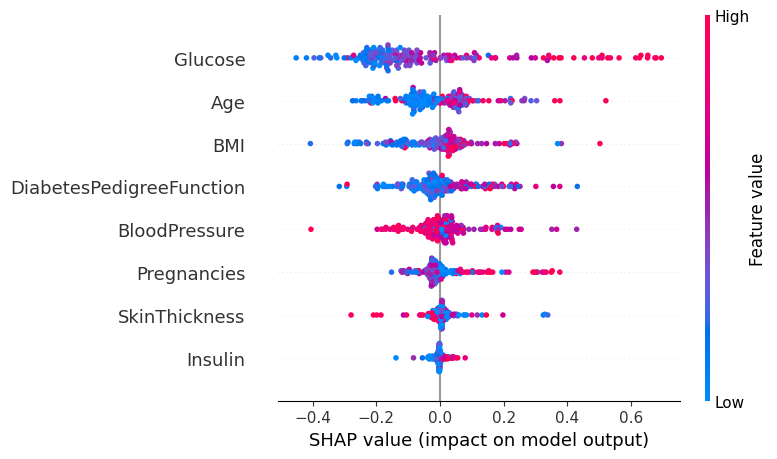

In [ ]:
import shap  # package used to calculate Shap values

# Create object that can calculate shap values
explainer = shap.TreeExplainer(tree_model)

# calculate shap values. This is what we will plot.
# Calculate shap_values for all of val_X rather than a single row, to have more data for plot.
shap_values = explainer.shap_values(X_test)

# Make plot. Index of [1] is explained in text below.
shap.summary_plot(shap_values[1],X_test)

### 5. LIME: Locally Interpretable Model-Agnostic Explanations
- 모든 예측 모델에 대한 결과를 해석 가능하고 신뢰할 수 있는 방법으로 설명하는 새로운 기법을 제공하는 알고리즘
- 참고 : https://moondol-ai.tistory.com/396

In [ ]:
import pandas as pd
import numpy as np

data = pd.read_csv('/content/drive/MyDrive/Pima/diabetes.csv')

In [ ]:
cols = data.columns
print(f'Before Data Shape: {data.shape}')
total = 0
for col in cols:
    mean = data[col].mean()
    std = data[col].std()
    th = mean + 3 *std
    outlier = np.sum(data[col]>th)
    data.drop(data[data[col]>th].index[:], inplace=True)
    total += outlier

data.dropna()
print(f'Drop: {total}')
print(f'after Data Shape: {data.shape}')


Before Data Shape: (768, 9)
Drop: 41
after Data Shape: (727, 9)


In [ ]:
from sklearn.preprocessing import StandardScaler

std_scale = StandardScaler()

y = data['Outcome']
X = data.drop(['Outcome'], axis=1)

X_std_scaled = std_scale.fit_transform(X)


In [ ]:

from sklearn.model_selection import train_test_split


X_train, X_test, y_train, y_test = train_test_split(X_std_scaled, y, test_size=0.2, random_state=42)

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)


(581, 8)
(146, 8)
(581,)
(146,)


In [ ]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(min_samples_split=10, n_estimators=100)

rf.fit(X_train, y_train)

y_pred = rf.predict(X_test)

<Axes: ylabel='None'>

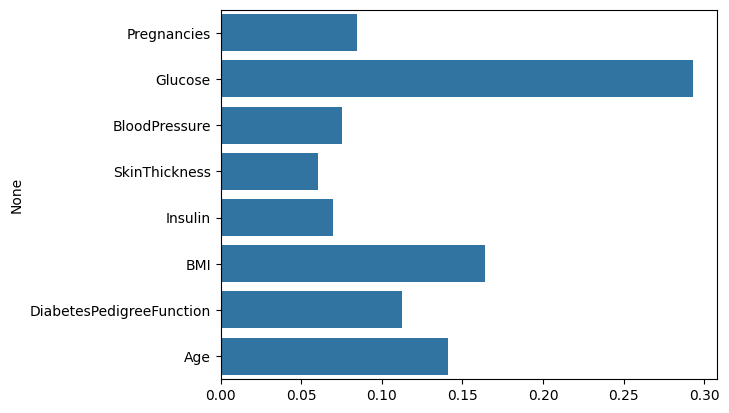

In [ ]:
import seaborn as sns
sns.barplot(x=rf.feature_importances_, y = data.drop(['Outcome'], axis=1).columns)

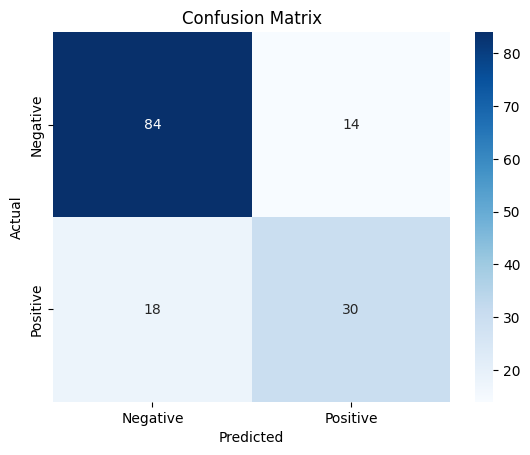

In [ ]:
import seaborn as sns
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt

# confusion matrix 생성
cm = confusion_matrix(y_test, y_pred)

# 히트맵으로 시각화
sns.heatmap(cm, annot=True, cmap='Blues')

# 행렬의 제목과 레이블
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')

# x, y 축에 클래스 이름 표시
class_names = ['Negative', 'Positive']
tick_marks = [0.5, 1.5]
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)

plt.show()


AUROC:  0.7410714285714286
Accuracy:  0.7808219178082192
Precision:  0.6818181818181818
Recall:  0.625


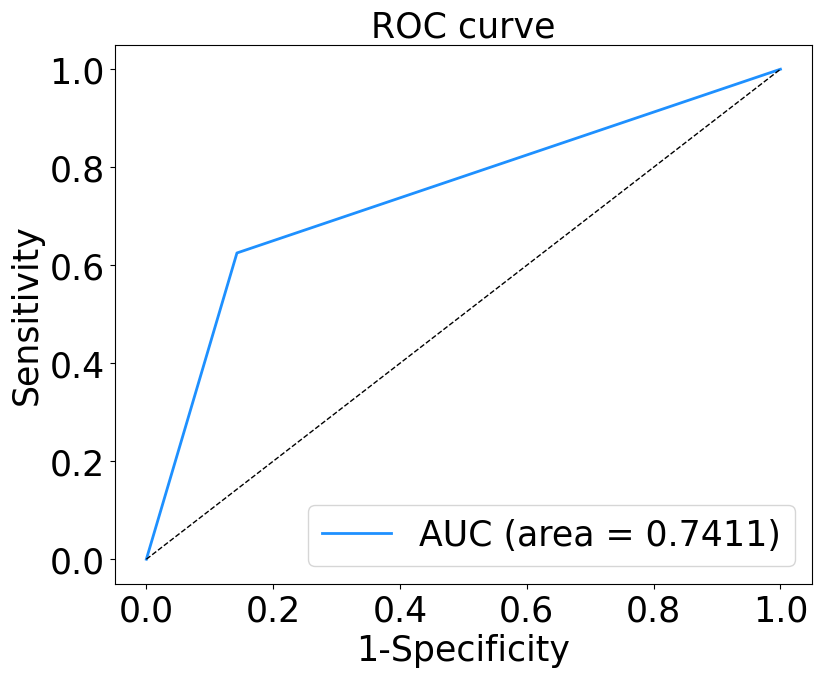

In [ ]:
from sklearn.metrics import roc_curve, auc, accuracy_score, precision_score, recall_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
fpr, tpr, th = roc_curve(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
roc_auc = auc(fpr, tpr)

print("AUROC: ", roc_auc)
print("Accuracy: ", accuracy)
print("Precision: ", precision)
print("Recall: ", recall)

plt.figure(figsize=[9,7])
plt.plot(fpr, tpr, color='dodgerblue', lw=2, label='AUC (area = %0.4f)' %roc_auc)
plt.plot([0,1],[0,1], color='black', lw=1, linestyle='--')
plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.xlabel('1-Specificity', fontsize=25) # [FPR]
plt.ylabel('Sensitivity', fontsize=25) # [TPR]
plt.title('ROC curve', fontsize=25)
plt.legend(loc='lower right', fontsize=25)
plt.xticks(fontsize=25)
plt.yticks(fontsize=25)
plt.show()

In [ ]:
!pip install lime

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 275.7/275.7 kB 5.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for lime: filename=lime-0.2.0.1-py3-none-any.whl size=283835 sha256=ca39bd93e48a247a6a088ddbb1ffc1f259c63128ae3874bab79eec4eabd737f6
  Stored in directory: /root/.cache/pip/wheels/fd/a2/af/9ac0a1a85a27f314a06b39e1f492bee1547d52549a4606ed89
Successfully built lime


In [ ]:
import lime
from lime import lime_tabular

explainer = lime_tabular.LimeTabularExplainer(
    training_data=np.array(X_train),
    feature_names=data.columns,
    class_names=[0,1],
    mode='classification'
)


exp = explainer.explain_instance(
    data_row=X_train[1],
    predict_fn=rf.predict_proba
)

exp.show_in_notebook(show_table=True)